<a href="https://colab.research.google.com/github/amanteur/TDA_Cover_detection/blob/main/TDA_CoverDetection_ML_Models_Evaluation_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

#Libraries

In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn import metrics, model_selection, svm
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix, \
                            plot_roc_curve, \
                            roc_auc_score, \
                            f1_score,\
                            accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Extracting data

In [ ]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/CourseWork/final_pair_datasets/'

In [ ]:
df_dict = {}
for _, _, files in os.walk(root_dir):
  for file in files:
    file_splt = file.rsplit('_', 1)
    name = file_splt[0]
    tt = file_splt[1].split('.')[0]
    df = pd.read_json(root_dir + file)
    df_dict.setdefault(name, {})
    df_dict[name][tt] = df

#Models eval

In [ ]:
#models
def SVM_eval(X_train, X_test, y_train):
  svm = make_pipeline(preprocessing.StandardScaler(), SVC(gamma='auto'))
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return y_pred, svm

def GradBoost_eval(X_train, X_test, y_train):
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return y_pred, clf

def RF_eval(X_train, X_test, y_train):
  clf = RandomForestClassifier(n_estimators=100,
                                 max_depth=5, random_state=0)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return y_pred, clf

In [ ]:
def model_eval(df_dict, used_features, model_name='SVM', show_statistics=True):
  model_results = {}
  for name, train_test in df_dict.items():
    X_train = train_test['train'][used_features].to_numpy()
    X_test = train_test['test'][used_features].to_numpy()

    y_train = train_test['train'][['ref_cover']].to_numpy().ravel()
    y_test = train_test['test'][['ref_cover']].to_numpy().ravel()



    #model
    if model_name == 'SVM':
      y_pred, clf = SVM_eval(X_train, X_test, y_train)
    if model_name == 'GradBoost':
      y_pred, clf = GradBoost_eval(X_train, X_test, y_train)
    if model_name == 'RF':
      y_pred, clf = RF_eval(X_train, X_test, y_train)


    #metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    model_results.setdefault(name, {})
    model_results[name]['Model'] = model_name
    model_results[name]['accuracy'] = acc
    model_results[name]['f1_score'] = f1
    model_results[name]['ROC_AUC_score'] = roc_auc

    if show_statistics:
      print('Used Dataset: ', name)
      print(model_name)
      print('Accuracy score: {}, ROC AUC Score: {}, F1 Score: {}'.format(acc, roc_auc, f1))
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
      plot_roc_curve(clf, X_test, y_test, ax=ax2)
      class_names = ['ref-not cover', 'ref-cover']
      plot_confusion_matrix(clf, 
                            X_test, 
                            y_test, 
                            ax=ax1, 
                            cmap=plt.cm.Blues, 
                            display_labels=class_names)  
      plt.show()
  dict_df = pd.DataFrame.from_dict(model_results).transpose().reset_index()
  return dict_df

In [ ]:
features=['Landscape_norm',	'Silhouette_norm',	'Entropy_norm1',	'Betti_curves_norm',	'PWG_kernel',	'PSS_kernel',	'PF_kernel',	'SW_kernel',	'Bottleneck_distance',	'Wasserstein_distance']

In [ ]:
SVM_values = model_eval(df_dict, features, 'SVM', show_statistics=False)

In [ ]:
GradBoost_values = model_eval(df_dict, features, 'GradBoost', show_statistics=False)

In [ ]:
RF_values = model_eval(df_dict, features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,tf_DTM,RF,0.75,0.761905,0.75
1,ms_orig,SVM,0.65,0.740741,0.65
2,tf_sparse_opt,SVM,0.65,0.695652,0.65
3,af_orig,SVM,0.65,0.666667,0.65
4,tf_DTM,GradBoost,0.65,0.666667,0.65
5,af_orig,RF,0.65,0.588235,0.65
6,ms_orig,RF,0.6,0.666667,0.6
7,tf_orig,RF,0.6,0.636364,0.6
8,tf_orig,SVM,0.6,0.6,0.6
9,mf_orig,SVM,0.6,0.6,0.6


Another features

In [ ]:
features=['Bottleneck_distance',	'Wasserstein_distance']

In [ ]:
SVM_values = model_eval(df_dict, features, 'SVM', show_statistics=False)

In [ ]:
GradBoost_values = model_eval(df_dict, features, 'GradBoost', show_statistics=False)

In [ ]:
RF_values = model_eval(df_dict, features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,ms_orig,SVM,0.7,0.769231,0.7
1,ms_orig,RF,0.7,0.75,0.7
2,as_orig,SVM,0.7,0.666667,0.7
3,tf_sparse_opt,RF,0.65,0.666667,0.65
4,ms_orig,GradBoost,0.65,0.666667,0.65
5,mf_sparse,SVM,0.6,0.636364,0.6
6,ts_DTM,RF,0.6,0.636364,0.6
7,mf_DTM,GradBoost,0.6,0.6,0.6
8,ms_DTM,RF,0.6,0.555556,0.6
9,as_DTM,GradBoost,0.6,0.5,0.6


Another features

In [ ]:
features=['Landscape_norm',	'Silhouette_norm',	'Entropy_norm1',	'Betti_curves_norm']

In [ ]:
SVM_values = model_eval(df_dict, features, 'SVM', show_statistics=False)

In [ ]:
GradBoost_values = model_eval(df_dict, features, 'GradBoost', show_statistics=False)

In [ ]:
RF_values = model_eval(df_dict, features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,tf_sparse_opt,SVM,0.7,0.727273,0.7
1,mf_orig,SVM,0.7,0.7,0.7
2,tf_sparse_opt,RF,0.65,0.695652,0.65
3,af_sparse,GradBoost,0.65,0.631579,0.65
4,tf_sparse,SVM,0.6,0.692308,0.6
5,ms_orig,SVM,0.6,0.666667,0.6
6,tf_sparse_opt,GradBoost,0.6,0.666667,0.6
7,ts_orig,GradBoost,0.6,0.555556,0.6
8,ts_opt,RF,0.6,0.333333,0.6
9,ts_opt,GradBoost,0.6,0.333333,0.6


Another features

In [ ]:
features=['PWG_kernel',	'PSS_kernel',	'PF_kernel',	'SW_kernel']

In [ ]:
SVM_values = model_eval(df_dict, features, 'SVM', show_statistics=False)

In [ ]:
GradBoost_values = model_eval(df_dict, features, 'GradBoost', show_statistics=False)

In [ ]:
RF_values = model_eval(df_dict, features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values, SVM_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,af_orig,SVM,0.75,0.782609,0.75
1,af_orig,SVM,0.75,0.782609,0.75
2,as_orig,RF,0.7,0.7,0.7
3,ts_opt,RF,0.7,0.7,0.7
4,mf_orig,SVM,0.7,0.666667,0.7
5,mf_orig,SVM,0.7,0.666667,0.7
6,tf_orig,RF,0.65,0.695652,0.65
7,ts_DTM,RF,0.65,0.695652,0.65
8,tf_orig,GradBoost,0.65,0.666667,0.65
9,af_orig,RF,0.65,0.631579,0.65


#Feature selection

In [ ]:
import seaborn as sns

In [ ]:
features=['Landscape_norm',	'Silhouette_norm',	'Entropy_norm1',	'Betti_curves_norm',	'PWG_kernel',	'PSS_kernel',	'PF_kernel',	'SW_kernel',	'Bottleneck_distance',	'Wasserstein_distance']

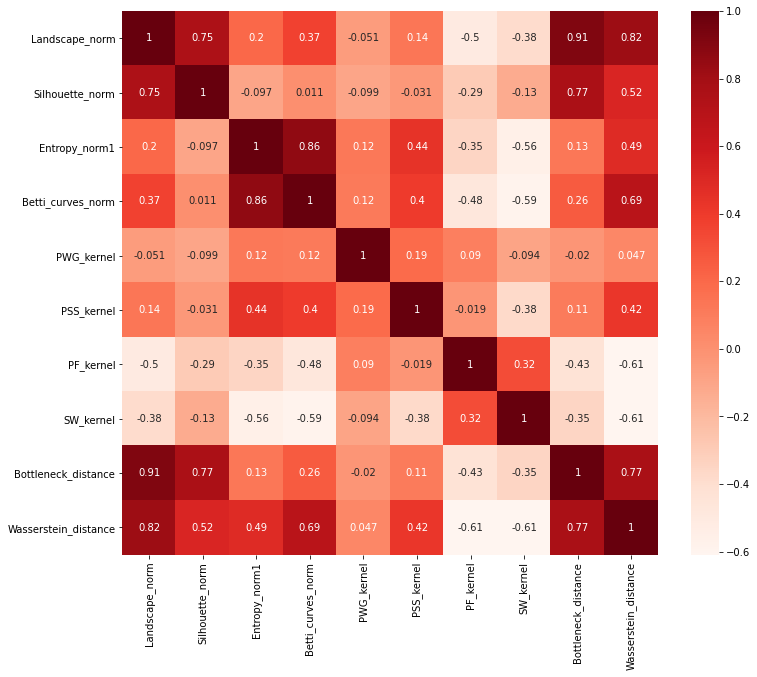

In [ ]:
plt.figure(figsize=(12,10))
cor = df_dict['ts_orig']['train'][features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Similar features:
- Landscape norm, silhouette norm, bottleneck distance, wasserstein distance
- Entropy norm and Betti curves norm


## Variance Threshold

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

def find_features_var_thr(df_dict, all_features, trh=1):
  scaler = StandardScaler()
  selector = VarianceThreshold(trh)
  features_dict = {}
  for name, train_test in df_dict.items():
    X = train_test['train'][all_features]
    X_scl = pd.DataFrame(scaler.fit_transform(X), columns = all_features)
      
    selector.fit(X_scl)
    features_dict[name] = X_scl.columns[selector.get_support()].tolist()
  return features_dict

In [ ]:
vt_features = find_features_var_thr(df_dict, features)

In [ ]:
vt_features

{'af_DTM': ['Landscape_norm', 'SW_kernel'],
 'af_orig': ['Landscape_norm', 'PSS_kernel', 'PF_kernel'],
 'af_sparse': ['Entropy_norm1'],
 'as_DTM': ['Landscape_norm',
  'Entropy_norm1',
  'PWG_kernel',
  'PSS_kernel',
  'PF_kernel'],
 'as_orig': ['Silhouette_norm',
  'Betti_curves_norm',
  'PWG_kernel',
  'PSS_kernel',
  'PF_kernel',
  'Wasserstein_distance'],
 'mf_DTM': ['Entropy_norm1', 'Betti_curves_norm'],
 'mf_orig': ['Silhouette_norm', 'SW_kernel'],
 'mf_sparse': ['Silhouette_norm', 'Betti_curves_norm', 'PSS_kernel'],
 'ms_DTM': ['PWG_kernel', 'PF_kernel', 'SW_kernel'],
 'ms_orig': ['Landscape_norm', 'PSS_kernel'],
 'tf_DTM': ['Landscape_norm', 'Entropy_norm1', 'PF_kernel'],
 'tf_orig': ['Wasserstein_distance'],
 'tf_sparse': ['Silhouette_norm'],
 'tf_sparse_opt': ['PWG_kernel', 'PF_kernel', 'SW_kernel'],
 'ts_DTM': ['Entropy_norm1', 'PWG_kernel', 'SW_kernel', 'Bottleneck_distance'],
 'ts_opt': ['Wasserstein_distance'],
 'ts_orig': ['Entropy_norm1', 'Betti_curves_norm']}

## SelectKBest


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def find_features_k_best(df_dict, all_features, k=3):
  features_dict = {}
  for name, train_test in df_dict.items():
    X = train_test['train'][all_features]
    y = train_test['train']['ref_cover']
    selector = SelectKBest(mutual_info_classif, k)
    selector.fit(X, y)
    features_dict[name] = X.columns[selector.get_support()].tolist()
  return features_dict

In [ ]:
kb_features = find_features_k_best(df_dict, features)

In [ ]:
kb_features

{'af_DTM': ['Landscape_norm', 'PSS_kernel', 'Wasserstein_distance'],
 'af_orig': ['Landscape_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'af_sparse': ['PF_kernel', 'SW_kernel', 'Wasserstein_distance'],
 'as_DTM': ['Entropy_norm1', 'SW_kernel', 'Bottleneck_distance'],
 'as_orig': ['Landscape_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'mf_DTM': ['PSS_kernel', 'PF_kernel', 'Wasserstein_distance'],
 'mf_orig': ['Silhouette_norm', 'Betti_curves_norm', 'PF_kernel'],
 'mf_sparse': ['Betti_curves_norm', 'PSS_kernel', 'Bottleneck_distance'],
 'ms_DTM': ['Silhouette_norm', 'SW_kernel', 'Bottleneck_distance'],
 'ms_orig': ['Entropy_norm1', 'Betti_curves_norm', 'PWG_kernel'],
 'tf_DTM': ['Landscape_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'tf_orig': ['PWG_kernel', 'PSS_kernel', 'SW_kernel'],
 'tf_sparse': ['Landscape_norm', 'Entropy_norm1', 'Bottleneck_distance'],
 'tf_sparse_opt': ['Landscape_norm', 'PWG_kernel', 'Bottleneck_distance'],
 'ts_DTM': ['Landscape_norm', 'Entropy_norm1', 

##Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def find_features_recursive(df_dict, all_features, est, n_features=3):
  features_dict = {}
  for name, train_test in df_dict.items():
    X = train_test['train'][all_features]
    y = train_test['train']['ref_cover']
    rfe_selector = RFE(estimator=est,n_features_to_select = n_features, step = 1)
    rfe_selector.fit(X, y)
    features_dict[name] = X.columns[rfe_selector.get_support()].tolist()
  return features_dict

In [ ]:
est = SVC(kernel="linear", C=1)
rec_features_SVM = find_features_recursive(df_dict, features, est)

In [ ]:
rec_features_SVM

{'af_DTM': ['Silhouette_norm', 'Bottleneck_distance', 'Wasserstein_distance'],
 'af_orig': ['Silhouette_norm', 'Bottleneck_distance', 'Wasserstein_distance'],
 'af_sparse': ['Landscape_norm', 'PSS_kernel', 'Wasserstein_distance'],
 'as_DTM': ['Landscape_norm', 'Silhouette_norm', 'Bottleneck_distance'],
 'as_orig': ['Landscape_norm', 'Silhouette_norm', 'Wasserstein_distance'],
 'mf_DTM': ['Landscape_norm', 'Silhouette_norm', 'PSS_kernel'],
 'mf_orig': ['Landscape_norm', 'Silhouette_norm', 'Bottleneck_distance'],
 'mf_sparse': ['Landscape_norm', 'Silhouette_norm', 'PSS_kernel'],
 'ms_DTM': ['Landscape_norm', 'Bottleneck_distance', 'Wasserstein_distance'],
 'ms_orig': ['PSS_kernel', 'Bottleneck_distance', 'Wasserstein_distance'],
 'tf_DTM': ['Landscape_norm', 'Silhouette_norm', 'Bottleneck_distance'],
 'tf_orig': ['Landscape_norm', 'Silhouette_norm', 'Bottleneck_distance'],
 'tf_sparse': ['Landscape_norm', 'Silhouette_norm', 'Wasserstein_distance'],
 'tf_sparse_opt': ['Silhouette_norm',
 

In [ ]:
est = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
rec_features_GB = find_features_recursive(df_dict, features, est)

In [ ]:
rec_features_GB

{'af_DTM': ['Silhouette_norm', 'PF_kernel', 'Wasserstein_distance'],
 'af_orig': ['Entropy_norm1', 'PWG_kernel', 'Bottleneck_distance'],
 'af_sparse': ['Betti_curves_norm',
  'Bottleneck_distance',
  'Wasserstein_distance'],
 'as_DTM': ['Entropy_norm1', 'PSS_kernel', 'Bottleneck_distance'],
 'as_orig': ['Betti_curves_norm', 'PWG_kernel', 'Bottleneck_distance'],
 'mf_DTM': ['Landscape_norm', 'Entropy_norm1', 'PF_kernel'],
 'mf_orig': ['Betti_curves_norm', 'PWG_kernel', 'PSS_kernel'],
 'mf_sparse': ['Silhouette_norm', 'Entropy_norm1', 'PSS_kernel'],
 'ms_DTM': ['PF_kernel', 'Bottleneck_distance', 'Wasserstein_distance'],
 'ms_orig': ['Landscape_norm', 'Betti_curves_norm', 'PWG_kernel'],
 'tf_DTM': ['Landscape_norm', 'Betti_curves_norm', 'PF_kernel'],
 'tf_orig': ['Silhouette_norm', 'PWG_kernel', 'PSS_kernel'],
 'tf_sparse': ['Entropy_norm1', 'Bottleneck_distance', 'Wasserstein_distance'],
 'tf_sparse_opt': ['Entropy_norm1',
  'Bottleneck_distance',
  'Wasserstein_distance'],
 'ts_DTM': [

In [ ]:
est = RandomForestClassifier(n_estimators=100,
                                 max_depth=5, random_state=0)
rec_features_RF = find_features_recursive(df_dict, features, est)

In [ ]:
rec_features_RF

{'af_DTM': ['PSS_kernel', 'PF_kernel', 'Wasserstein_distance'],
 'af_orig': ['Entropy_norm1', 'Betti_curves_norm', 'PWG_kernel'],
 'af_sparse': ['PF_kernel', 'SW_kernel', 'Bottleneck_distance'],
 'as_DTM': ['Silhouette_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'as_orig': ['Landscape_norm', 'Betti_curves_norm', 'Bottleneck_distance'],
 'mf_DTM': ['Entropy_norm1', 'PSS_kernel', 'PF_kernel'],
 'mf_orig': ['Entropy_norm1', 'PWG_kernel', 'PF_kernel'],
 'mf_sparse': ['Landscape_norm', 'Silhouette_norm', 'PSS_kernel'],
 'ms_DTM': ['Silhouette_norm', 'PWG_kernel', 'Wasserstein_distance'],
 'ms_orig': ['Landscape_norm', 'PWG_kernel', 'Bottleneck_distance'],
 'tf_DTM': ['Landscape_norm', 'Entropy_norm1', 'PF_kernel'],
 'tf_orig': ['Silhouette_norm', 'PSS_kernel', 'PF_kernel'],
 'tf_sparse': ['Silhouette_norm', 'PWG_kernel', 'Bottleneck_distance'],
 'tf_sparse_opt': ['Entropy_norm1', 'PWG_kernel', 'PSS_kernel'],
 'ts_DTM': ['Entropy_norm1', 'PSS_kernel', 'PF_kernel'],
 'ts_opt': ['Landscape_

##Sequential Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

def find_features_sequence(df_dict, all_features, est, n_features=3):
  features_dict = {}
  for name, train_test in df_dict.items():
    X = train_test['train'][all_features]
    y = train_test['train']['ref_cover']
    sfs_selector = SequentialFeatureSelector(estimator=est, 
                                             n_features_to_select = n_features, 
                                             cv =10, direction ='backward')
    sfs_selector.fit(X, y)
    X.columns[sfs_selector.get_support()]
    features_dict[name] = X.columns[sfs_selector.get_support()].tolist()
  return features_dict

In [ ]:
est = SVC(kernel="linear", C=1)
seq_features_SVM = find_features_sequence(df_dict, features, est)

In [ ]:
seq_features_SVM

{'af_DTM': ['Landscape_norm', 'SW_kernel', 'Bottleneck_distance'],
 'af_orig': ['Betti_curves_norm', 'PWG_kernel', 'Wasserstein_distance'],
 'af_sparse': ['Entropy_norm1', 'Betti_curves_norm', 'PWG_kernel'],
 'as_DTM': ['Betti_curves_norm', 'PSS_kernel', 'Wasserstein_distance'],
 'as_orig': ['Landscape_norm', 'PSS_kernel', 'Wasserstein_distance'],
 'mf_DTM': ['Silhouette_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'mf_orig': ['Landscape_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'mf_sparse': ['Landscape_norm', 'Betti_curves_norm', 'PWG_kernel'],
 'ms_DTM': ['Landscape_norm', 'Entropy_norm1', 'Wasserstein_distance'],
 'ms_orig': ['Silhouette_norm', 'Betti_curves_norm', 'PWG_kernel'],
 'tf_DTM': ['Silhouette_norm', 'Entropy_norm1', 'PWG_kernel'],
 'tf_orig': ['Silhouette_norm', 'Entropy_norm1', 'Betti_curves_norm'],
 'tf_sparse': ['Landscape_norm', 'Silhouette_norm', 'Wasserstein_distance'],
 'tf_sparse_opt': ['Silhouette_norm',
  'Betti_curves_norm',
  'Bottleneck_distance'],
 't

In [ ]:
est = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
seq_features_GB = find_features_sequence(df_dict, features, est)

In [ ]:
seq_features_GB

{'af_DTM': ['Landscape_norm', 'PF_kernel', 'Wasserstein_distance'],
 'af_orig': ['Entropy_norm1', 'Betti_curves_norm', 'PWG_kernel'],
 'af_sparse': ['PWG_kernel', 'PSS_kernel', 'Bottleneck_distance'],
 'as_DTM': ['Silhouette_norm', 'SW_kernel', 'Bottleneck_distance'],
 'as_orig': ['PSS_kernel', 'PF_kernel', 'Wasserstein_distance'],
 'mf_DTM': ['Entropy_norm1', 'PWG_kernel', 'PF_kernel'],
 'mf_orig': ['Silhouette_norm', 'Entropy_norm1', 'PWG_kernel'],
 'mf_sparse': ['Entropy_norm1', 'Betti_curves_norm', 'PSS_kernel'],
 'ms_DTM': ['Silhouette_norm', 'PF_kernel', 'Bottleneck_distance'],
 'ms_orig': ['Landscape_norm', 'Betti_curves_norm', 'Wasserstein_distance'],
 'tf_DTM': ['Entropy_norm1', 'Betti_curves_norm', 'PF_kernel'],
 'tf_orig': ['Betti_curves_norm', 'PSS_kernel', 'Wasserstein_distance'],
 'tf_sparse': ['Entropy_norm1', 'PSS_kernel', 'SW_kernel'],
 'tf_sparse_opt': ['Entropy_norm1',
  'Bottleneck_distance',
  'Wasserstein_distance'],
 'ts_DTM': ['PSS_kernel', 'PF_kernel', 'Bottlen

In [ ]:
est = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
seq_features_RF = find_features_sequence(df_dict, features, est)

tf_DTM
as_orig
ts_opt
ms_orig


In [ ]:
seq_features_RF

{'as_orig': ['Landscape_norm', 'Bottleneck_distance', 'Wasserstein_distance'],
 'ms_orig': ['Landscape_norm', 'Silhouette_norm', 'Entropy_norm1'],
 'tf_DTM': ['Landscape_norm', 'Entropy_norm1', 'PF_kernel'],
 'ts_opt': ['Landscape_norm', 'SW_kernel', 'Bottleneck_distance']}

##Selected features testing

Baselines:
- tf_DTM	RF	0.75	0.761905	0.75
- ms_orig	SVM	0.7	0.769231	0.7 
- tf_sparse_opt	SVM	0.7	0.727273	0.7
- af_orig	SVM	0.75	0.782609	0.75

In [ ]:
def feature_sel_model_eval(df_dict, features_dict, model_name='SVM', show_statistics=True):
  model_results = {}
  for name, train_test in df_dict.items():
    used_features = features_dict[name]
    X_train = train_test['train'][used_features].to_numpy()
    X_test = train_test['test'][used_features].to_numpy()

    y_train = train_test['train'][['ref_cover']].to_numpy().ravel()
    y_test = train_test['test'][['ref_cover']].to_numpy().ravel()

    #model
    if model_name == 'SVM':
      y_pred, clf = SVM_eval(X_train, X_test, y_train)
    if model_name == 'GradBoost':
      y_pred, clf = GradBoost_eval(X_train, X_test, y_train)
    if model_name == 'RF':
      y_pred, clf = RF_eval(X_train, X_test, y_train)

    #metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    model_results.setdefault(name, {})
    model_results[name]['Model'] = model_name
    model_results[name]['accuracy'] = acc
    model_results[name]['f1_score'] = f1
    model_results[name]['ROC_AUC_score'] = roc_auc

    if show_statistics:
      print('Used Dataset: ', name)
      print('Used Model: ', model_name)
      print('Used Features: ', used_features)
      print('Accuracy score: {}, ROC AUC Score: {}, F1 Score: {}'.format(acc, roc_auc, f1))
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
      plot_roc_curve(clf, X_test, y_test, ax=ax2)
      class_names = ['ref-not cover', 'ref-cover']
      plot_confusion_matrix(clf, 
                            X_test, 
                            y_test, 
                            ax=ax1, 
                            cmap=plt.cm.Blues, 
                            display_labels=class_names)  
      plt.show()
  dict_df = pd.DataFrame.from_dict(model_results).transpose().reset_index()
  return dict_df

###Varience Threshold

In [ ]:
SVM_values = feature_sel_model_eval(df_dict, vt_features, 'SVM', show_statistics=False)
GradBoost_values = feature_sel_model_eval(df_dict, vt_features, 'GradBoost', show_statistics=False)
RF_values = feature_sel_model_eval(df_dict, vt_features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,ms_orig,GradBoost,0.75,0.736842,0.75
1,tf_sparse,RF,0.75,0.705882,0.75
2,tf_sparse,GradBoost,0.75,0.705882,0.75
3,af_orig,GradBoost,0.7,0.727273,0.7
4,af_orig,RF,0.65,0.695652,0.65
5,ms_orig,RF,0.65,0.666667,0.65
6,as_orig,RF,0.65,0.631579,0.65
7,ts_orig,GradBoost,0.65,0.631579,0.65
8,tf_DTM,RF,0.6,0.636364,0.6
9,tf_sparse,SVM,0.6,0.6,0.6


###SelectKBest

In [ ]:
SVM_values = feature_sel_model_eval(df_dict, kb_features, 'SVM', show_statistics=False)
GradBoost_values = feature_sel_model_eval(df_dict, kb_features, 'GradBoost', show_statistics=False)
RF_values = feature_sel_model_eval(df_dict, kb_features, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,tf_orig,RF,0.65,0.695652,0.65
1,mf_sparse,GradBoost,0.65,0.631579,0.65
2,tf_orig,SVM,0.65,0.588235,0.65
3,mf_orig,SVM,0.6,0.666667,0.6
4,tf_orig,GradBoost,0.6,0.6,0.6
5,as_DTM,GradBoost,0.6,0.6,0.6
6,ts_opt,RF,0.6,0.5,0.6
7,tf_sparse_opt,SVM,0.55,0.608696,0.55
8,tf_DTM,RF,0.55,0.608696,0.55
9,mf_sparse,RF,0.55,0.608696,0.55


### Recursive Features Elimination

In [ ]:
SVM_values = feature_sel_model_eval(df_dict, rec_features_SVM, 'SVM', show_statistics=False)
GradBoost_values = feature_sel_model_eval(df_dict, rec_features_GB, 'GradBoost', show_statistics=False)
RF_values = feature_sel_model_eval(df_dict, rec_features_RF, 'RF', show_statistics=False)

In [ ]:
SVM_values.append([RF_values, GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,tf_orig,RF,0.65,0.695652,0.65
1,mf_sparse,GradBoost,0.65,0.631579,0.65
2,tf_orig,SVM,0.65,0.588235,0.65
3,mf_orig,SVM,0.6,0.666667,0.6
4,tf_orig,GradBoost,0.6,0.6,0.6
5,as_DTM,GradBoost,0.6,0.6,0.6
6,ts_opt,RF,0.6,0.5,0.6
7,tf_sparse_opt,SVM,0.55,0.608696,0.55
8,tf_DTM,RF,0.55,0.608696,0.55
9,mf_sparse,RF,0.55,0.608696,0.55


### Sequential Feature Selection

In [ ]:
SVM_values = feature_sel_model_eval(df_dict, seq_features_SVM, 'SVM', show_statistics=False)
GradBoost_values = feature_sel_model_eval(df_dict, seq_features_GB, 'GradBoost', show_statistics=False)

In [ ]:
SVM_values.append([GradBoost_values]).sort_values(by=['accuracy', 'f1_score', 'ROC_AUC_score'], ascending=False).reset_index(drop=True).head(10)

,index,Model,accuracy,f1_score,ROC_AUC_score
0,ms_orig,SVM,0.8,0.818182,0.8
1,tf_sparse,SVM,0.65,0.72,0.65
2,af_orig,SVM,0.65,0.72,0.65
3,as_DTM,SVM,0.65,0.666667,0.65
4,ms_orig,SVM,0.6,0.714286,0.6
5,af_orig,SVM,0.6,0.666667,0.6
6,ts_DTM,SVM,0.6,0.636364,0.6
7,mf_orig,SVM,0.6,0.6,0.6
8,as_orig,SVM,0.6,0.6,0.6
9,tf_sparse_opt,SVM,0.6,0.555556,0.6


Used Dataset:  af_orig
Used Model:  SVM
Used Features:  ['Betti_curves_norm', 'PWG_kernel', 'Wasserstein_distance']
Accuracy score: 0.6, ROC AUC Score: 0.6000000000000001, F1 Score: 0.6666666666666666


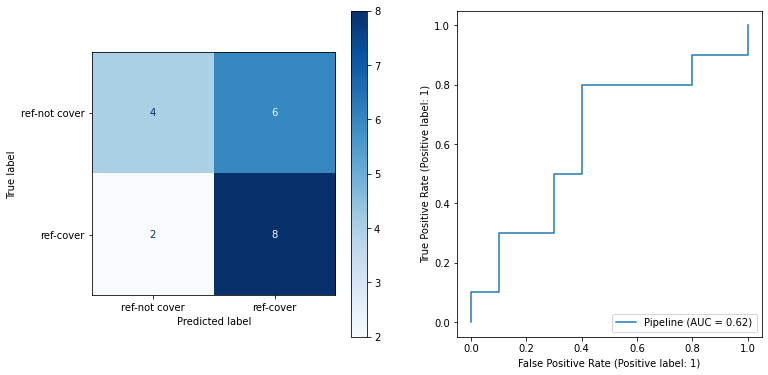

Used Dataset:  af_sparse
Used Model:  SVM
Used Features:  ['Entropy_norm1', 'Betti_curves_norm', 'PWG_kernel']
Accuracy score: 0.55, ROC AUC Score: 0.55, F1 Score: 0.64


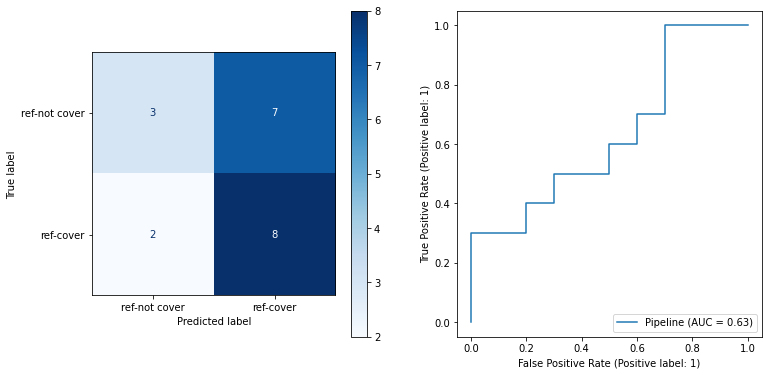

Used Dataset:  af_DTM
Used Model:  SVM
Used Features:  ['Landscape_norm', 'SW_kernel', 'Bottleneck_distance']
Accuracy score: 0.35, ROC AUC Score: 0.35, F1 Score: 0.4347826086956522


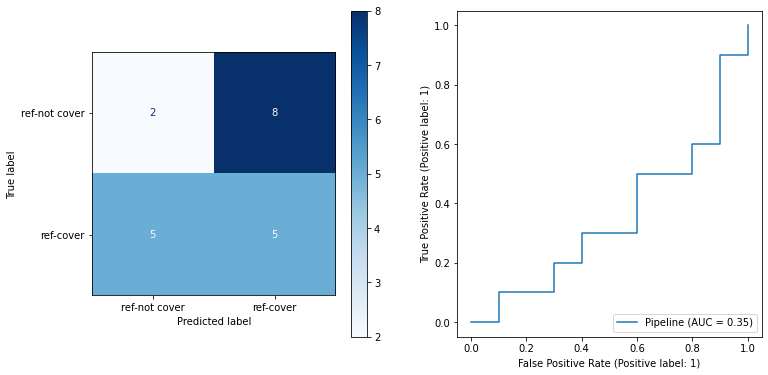

Used Dataset:  tf_orig
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Entropy_norm1', 'Betti_curves_norm']
Accuracy score: 0.45, ROC AUC Score: 0.44999999999999996, F1 Score: 0.4210526315789474


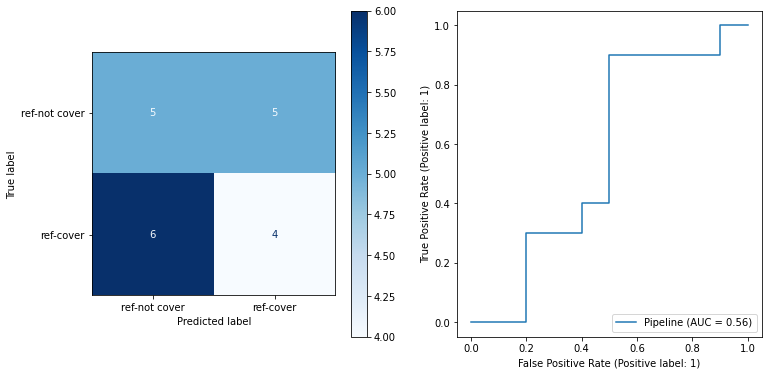

Used Dataset:  tf_sparse
Used Model:  SVM
Used Features:  ['Landscape_norm', 'Silhouette_norm', 'Wasserstein_distance']
Accuracy score: 0.65, ROC AUC Score: 0.65, F1 Score: 0.7200000000000001


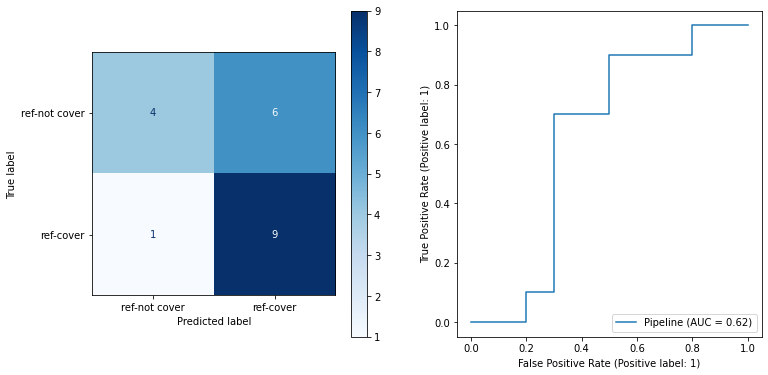

Used Dataset:  tf_sparse_opt
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Betti_curves_norm', 'Bottleneck_distance']
Accuracy score: 0.5, ROC AUC Score: 0.5, F1 Score: 0.5


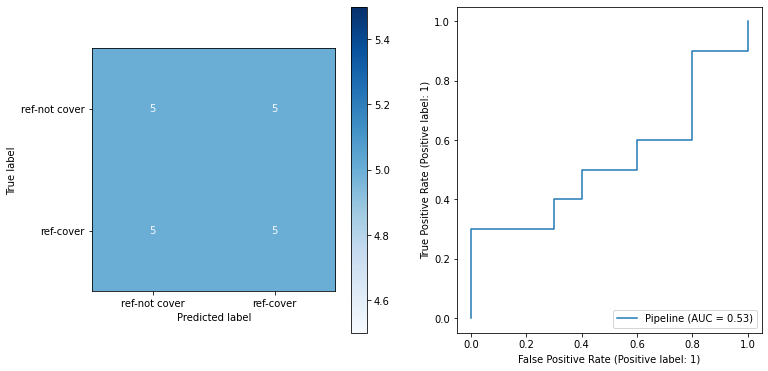

Used Dataset:  tf_DTM
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Entropy_norm1', 'PWG_kernel']
Accuracy score: 0.4, ROC AUC Score: 0.39999999999999997, F1 Score: 0.5


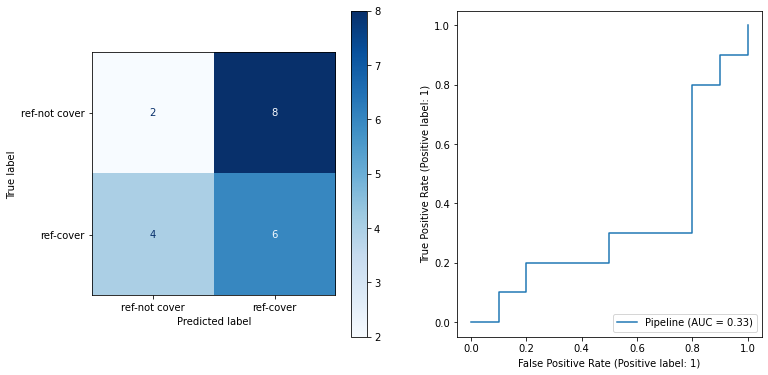

Used Dataset:  mf_orig
Used Model:  SVM
Used Features:  ['Landscape_norm', 'Entropy_norm1', 'Betti_curves_norm']
Accuracy score: 0.6, ROC AUC Score: 0.6, F1 Score: 0.6


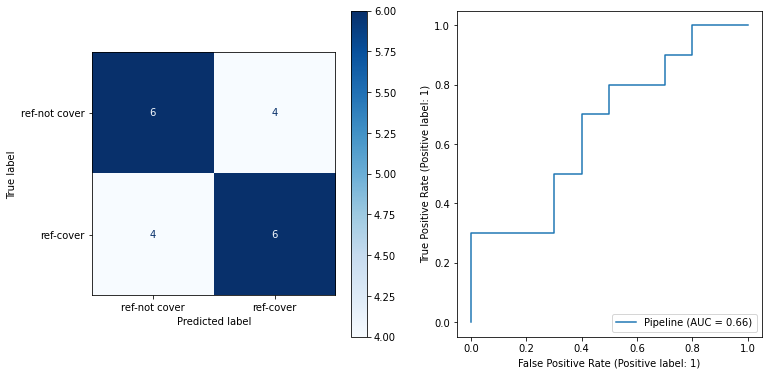

Used Dataset:  mf_sparse
Used Model:  SVM
Used Features:  ['Landscape_norm', 'Betti_curves_norm', 'PWG_kernel']
Accuracy score: 0.55, ROC AUC Score: 0.55, F1 Score: 0.5714285714285713


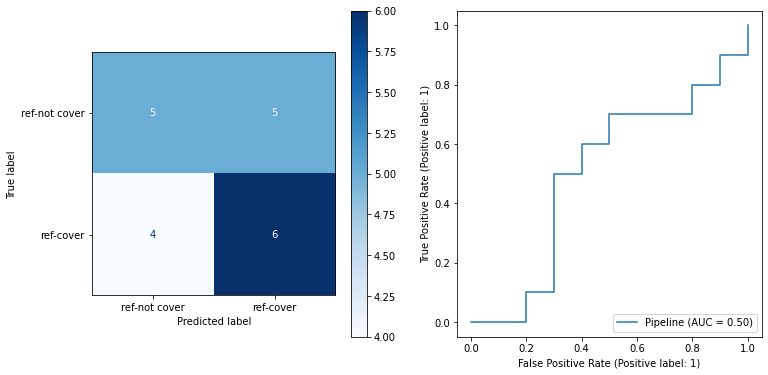

Used Dataset:  mf_DTM
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Entropy_norm1', 'Betti_curves_norm']
Accuracy score: 0.5, ROC AUC Score: 0.49999999999999994, F1 Score: 0.37499999999999994


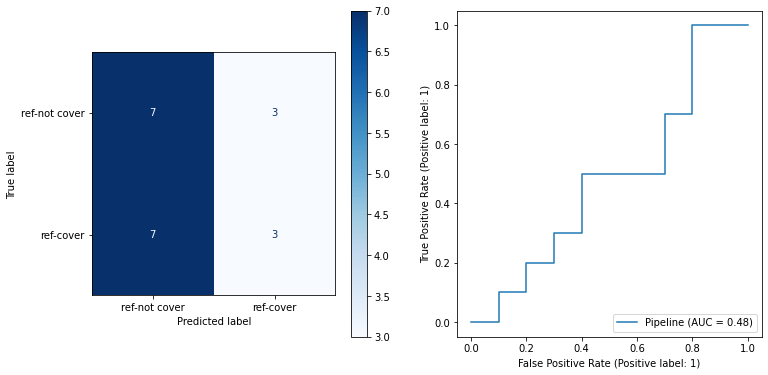

Used Dataset:  as_orig
Used Model:  SVM
Used Features:  ['Landscape_norm', 'PSS_kernel', 'Wasserstein_distance']
Accuracy score: 0.6, ROC AUC Score: 0.6, F1 Score: 0.6


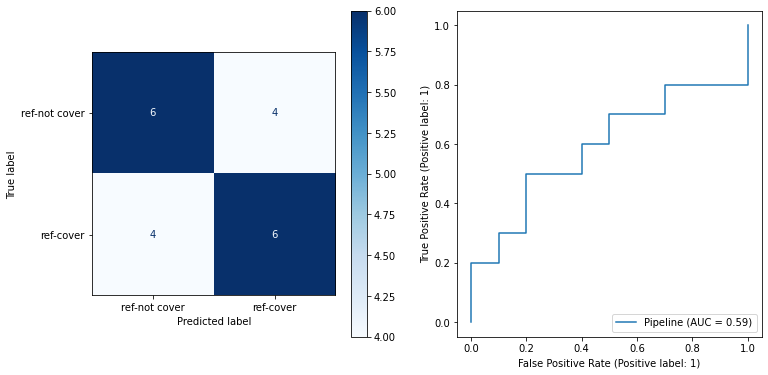

Used Dataset:  as_DTM
Used Model:  SVM
Used Features:  ['Betti_curves_norm', 'PSS_kernel', 'Wasserstein_distance']
Accuracy score: 0.65, ROC AUC Score: 0.65, F1 Score: 0.6666666666666666


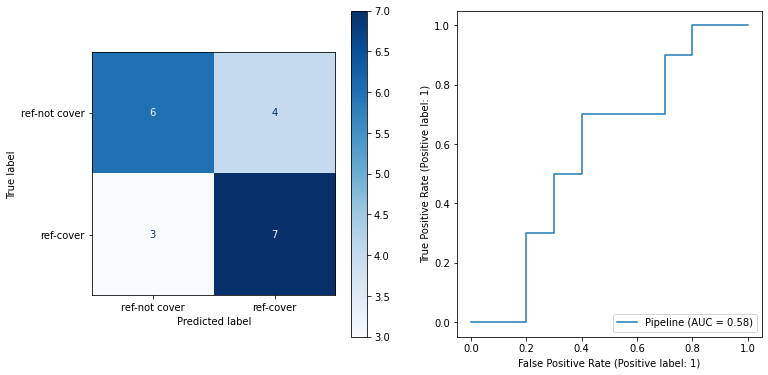

Used Dataset:  ts_orig
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Entropy_norm1', 'PWG_kernel']
Accuracy score: 0.45, ROC AUC Score: 0.45, F1 Score: 0.3529411764705882


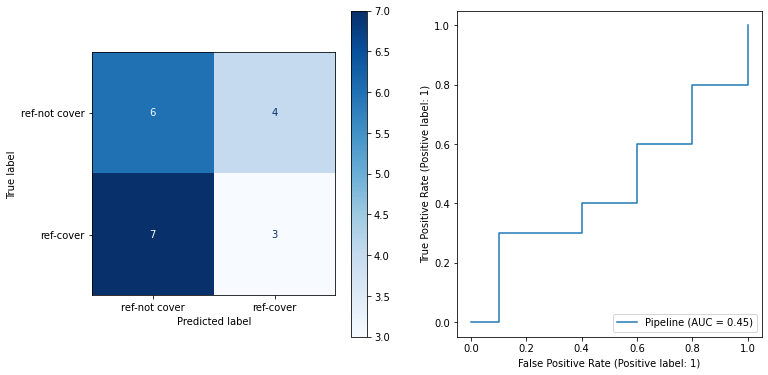

Used Dataset:  ts_opt
Used Model:  SVM
Used Features:  ['PWG_kernel', 'PSS_kernel', 'Wasserstein_distance']
Accuracy score: 0.45, ROC AUC Score: 0.44999999999999996, F1 Score: 0.56


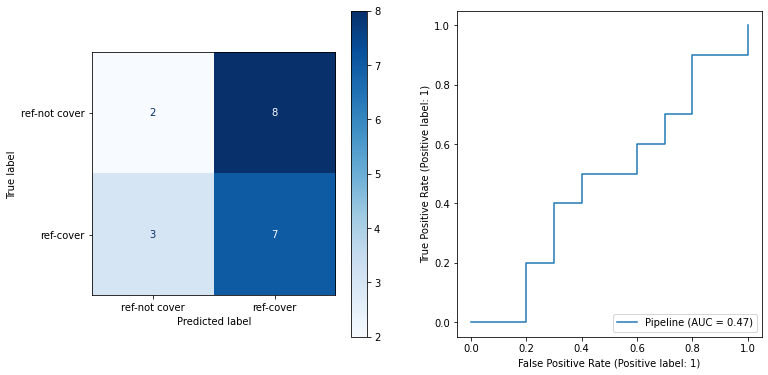

Used Dataset:  ts_DTM
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Betti_curves_norm', 'PSS_kernel']
Accuracy score: 0.6, ROC AUC Score: 0.6, F1 Score: 0.6363636363636365


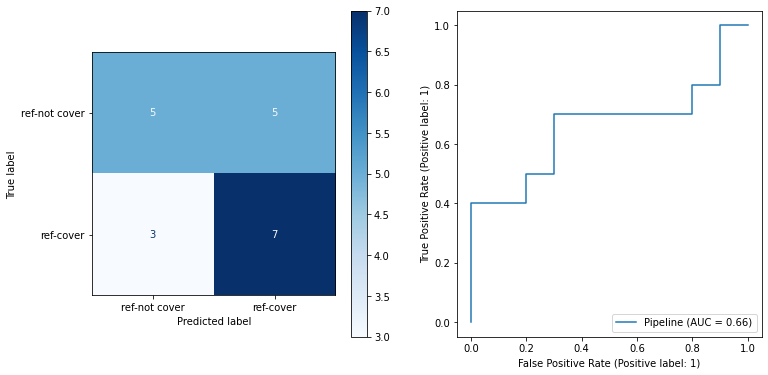

Used Dataset:  ms_orig
Used Model:  SVM
Used Features:  ['Silhouette_norm', 'Betti_curves_norm', 'PWG_kernel']
Accuracy score: 0.8, ROC AUC Score: 0.7999999999999999, F1 Score: 0.8181818181818182


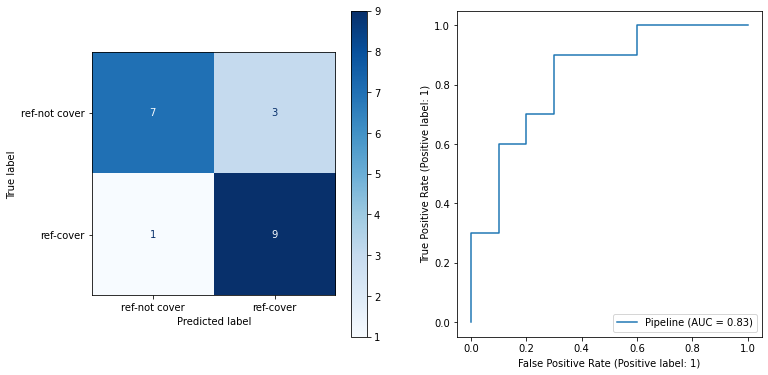

Used Dataset:  ms_DTM
Used Model:  SVM
Used Features:  ['Landscape_norm', 'Entropy_norm1', 'Wasserstein_distance']
Accuracy score: 0.55, ROC AUC Score: 0.5499999999999999, F1 Score: 0.5263157894736842


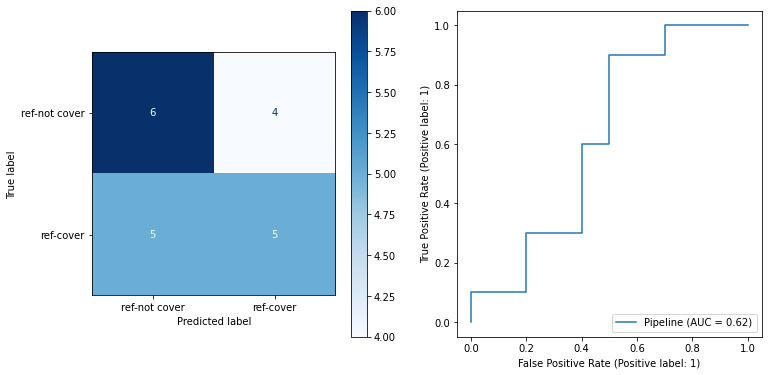

In [ ]:
SVM_values = feature_sel_model_eval(df_dict, seq_features_SVM, 'SVM', show_statistics=True)

Best one:  
- Dataset: MFCC Full Length  
- Model: SVM  
- Features: 'Silhouette_norm', 'Betti_curves_norm', 'PWG_kernel'  
- Scores:
  - Accuracy score: 0.8 
  - ROC AUC Score: 0.8, 
  - F1 Score: 0.82